# ORIGINAL DATA

In [ ]:
path = ("./DATA_updated")

In [ ]:
import cv2 as cv
%load_ext tensorboard

import numpy as np
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *


from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionResNetV2

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
train_datagen=ImageDataGenerator(
    validation_split=0.2, 
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.3,1.0],
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=False
    )


train_generator=train_datagen.flow_from_directory(path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory(
                                                path, # same directory as training data
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode="rgb",
                                                shuffle=True,
                                                subset='validation') # set as validation data

Found 538 images belonging to 109 classes.
Found 106 images belonging to 109 classes.


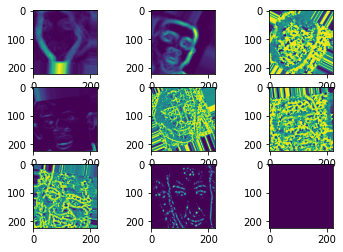

In [ ]:


import matplotlib.pyplot as plt

x,y = train_generator.next()

for i in range (9):
  plt.subplot(330 + 1 + i)
  igx1 = x[i]
  plt.imshow(igx1)
plt.show()



In [ ]:
import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

## RESNET 50 V2

In [ ]:
model = ResNe50V2(include_top =True, weights = None, classes = 109, input_shape = (224,224,3))

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/resnet50_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=150)

Epoch 1/150
16/16 [==============================] - 28s 2s/step - loss: 5.4036 - acc: 0.0020 - val_loss: 80.2825 - val_acc: 0.0104
Epoch 2/150
16/16 [==============================] - 12s 779ms/step - loss: 4.8439 - acc: 0.0119 - val_loss: 74.9561 - val_acc: 0.0104
Epoch 3/150
16/16 [==============================] - 12s 734ms/step - loss: 4.7838 - acc: 0.0158 - val_loss: 4.9071 - val_acc: 0.0104
Epoch 4/150
16/16 [==============================] - 12s 730ms/step - loss: 4.6921 - acc: 0.0158 - val_loss: 6.5294 - val_acc: 0.0208
Epoch 5/150
16/16 [==============================] - 12s 729ms/step - loss: 4.5968 - acc: 0.0293 - val_loss: 9.3855 - val_acc: 0.0104
Epoch 6/150
16/16 [==============================] - 11s 708ms/step - loss: 4.4990 - acc: 0.0280 - val_loss: 9.2023 - val_acc: 0.0104
Epoch 7/150
16/16 [==============================] - 11s 689ms/step - loss: 4.4820 - acc: 0.0257 - val_loss: 14.0572 - val_acc: 0.0104
Epoch 8/150
16/16 [==============================] - 11s 662ms

16/16 [==============================] - 11s 700ms/step - loss: 1.1816 - acc: 0.6522 - val_loss: 6.8440 - val_acc: 0.0625
Epoch 74/150
16/16 [==============================] - 11s 688ms/step - loss: 1.2689 - acc: 0.6443 - val_loss: 6.6741 - val_acc: 0.0729
Epoch 75/150
16/16 [==============================] - 11s 661ms/step - loss: 1.1401 - acc: 0.6504 - val_loss: 7.8397 - val_acc: 0.0521
Epoch 76/150
16/16 [==============================] - 10s 650ms/step - loss: 1.0473 - acc: 0.6820 - val_loss: 7.7426 - val_acc: 0.0521
Epoch 77/150
16/16 [==============================] - 10s 640ms/step - loss: 0.9158 - acc: 0.7363 - val_loss: 5.9140 - val_acc: 0.1562
Epoch 78/150
16/16 [==============================] - 10s 623ms/step - loss: 1.0204 - acc: 0.6957 - val_loss: 6.0785 - val_acc: 0.1042
Epoch 79/150
16/16 [==============================] - 10s 612ms/step - loss: 0.9660 - acc: 0.7080 - val_loss: 7.9818 - val_acc: 0.0417
Epoch 80/150
16/16 [==============================] - 9s 586ms/step 

Epoch 146/150
16/16 [==============================] - 10s 606ms/step - loss: 0.2499 - acc: 0.9219 - val_loss: 6.2089 - val_acc: 0.1875
Epoch 147/150
16/16 [==============================] - 10s 596ms/step - loss: 0.1908 - acc: 0.9506 - val_loss: 5.9519 - val_acc: 0.2188
Epoch 148/150
16/16 [==============================] - 9s 572ms/step - loss: 0.1537 - acc: 0.9644 - val_loss: 5.5317 - val_acc: 0.2396
Epoch 149/150
16/16 [==============================] - 9s 562ms/step - loss: 0.1451 - acc: 0.9700 - val_loss: 6.2339 - val_acc: 0.1875
Epoch 150/150
16/16 [==============================] - 9s 556ms/step - loss: 0.1694 - acc: 0.9512 - val_loss: 7.2462 - val_acc: 0.1250


In [ ]:
import _pickle as p
with open("./result_resnet50.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

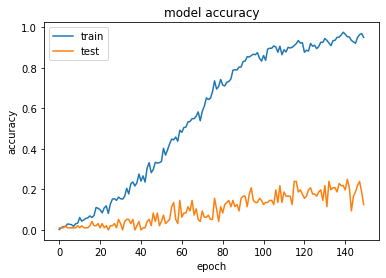

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## RESNET 101 V2

In [ ]:
model1 = ResNet101V2(include_top =True, weights = None, classes = 109, input_shape = (224,224,3))

In [ ]:
model1.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/resnet101_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model1.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=200)

Epoch 1/200
16/16 [==============================] - 47s 3s/step - loss: 5.4068 - acc: 0.0059 - val_loss: 204975.1458 - val_acc: 0.0104
Epoch 2/200
16/16 [==============================] - 15s 951ms/step - loss: 5.0110 - acc: 0.0040 - val_loss: 200923.1094 - val_acc: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 15s 926ms/step - loss: 4.8644 - acc: 0.0059 - val_loss: 420956.0417 - val_acc: 0.0104
Epoch 4/200
16/16 [==============================] - 15s 927ms/step - loss: 4.8131 - acc: 0.0119 - val_loss: 140.6755 - val_acc: 0.0104
Epoch 5/200
16/16 [==============================] - 15s 909ms/step - loss: 4.6734 - acc: 0.0195 - val_loss: 11.6459 - val_acc: 0.0104
Epoch 6/200
16/16 [==============================] - 14s 903ms/step - loss: 4.7615 - acc: 0.0158 - val_loss: 4.8706 - val_acc: 0.0104
Epoch 7/200
16/16 [==============================] - 14s 865ms/step - loss: 4.7199 - acc: 0.0120 - val_loss: 4.8768 - val_acc: 0.0104
Epoch 8/200
16/16 [========================

16/16 [==============================] - 15s 917ms/step - loss: 3.5636 - acc: 0.1146 - val_loss: 8.4786 - val_acc: 0.0208
Epoch 38/200
16/16 [==============================] - 14s 905ms/step - loss: 3.5919 - acc: 0.1270 - val_loss: 9.2226 - val_acc: 0.0417
Epoch 39/200
16/16 [==============================] - 14s 901ms/step - loss: 3.3575 - acc: 0.1720 - val_loss: 6.0758 - val_acc: 0.0312
Epoch 40/200
16/16 [==============================] - 14s 885ms/step - loss: 3.4218 - acc: 0.1309 - val_loss: 6.2239 - val_acc: 0.0312
Epoch 41/200
16/16 [==============================] - 14s 866ms/step - loss: 3.3307 - acc: 0.1700 - val_loss: 6.6865 - val_acc: 0.0312
Epoch 42/200
16/16 [==============================] - 14s 857ms/step - loss: 3.3596 - acc: 0.1620 - val_loss: 6.0139 - val_acc: 0.0417
Epoch 43/200
16/16 [==============================] - 14s 861ms/step - loss: 3.3280 - acc: 0.1700 - val_loss: 7.7550 - val_acc: 0.0208
Epoch 44/200
16/16 [==============================] - 14s 851ms/step

16/16 [==============================] - 14s 881ms/step - loss: 1.7105 - acc: 0.5079 - val_loss: 6.3157 - val_acc: 0.0833
Epoch 75/200
16/16 [==============================] - 14s 872ms/step - loss: 1.5242 - acc: 0.5352 - val_loss: 6.8660 - val_acc: 0.0521
Epoch 76/200
16/16 [==============================] - 14s 870ms/step - loss: 1.5112 - acc: 0.5760 - val_loss: 7.5389 - val_acc: 0.0625
Epoch 77/200
16/16 [==============================] - 14s 850ms/step - loss: 1.5211 - acc: 0.5711 - val_loss: 8.4549 - val_acc: 0.0729
Epoch 78/200
16/16 [==============================] - 13s 842ms/step - loss: 1.4220 - acc: 0.5474 - val_loss: 6.3577 - val_acc: 0.0833
Epoch 79/200
16/16 [==============================] - 13s 842ms/step - loss: 1.5070 - acc: 0.5625 - val_loss: 6.5758 - val_acc: 0.0833
Epoch 80/200
16/16 [==============================] - 13s 806ms/step - loss: 1.3444 - acc: 0.6087 - val_loss: 7.1197 - val_acc: 0.0625
Epoch 81/200
16/16 [==============================] - 13s 831ms/step

16/16 [==============================] - 14s 879ms/step - loss: 0.5428 - acc: 0.8359 - val_loss: 5.8366 - val_acc: 0.1875
Epoch 111/200
16/16 [==============================] - 14s 877ms/step - loss: 0.5942 - acc: 0.8142 - val_loss: 7.0192 - val_acc: 0.0938
Epoch 112/200
16/16 [==============================] - 14s 854ms/step - loss: 0.5734 - acc: 0.8380 - val_loss: 5.5326 - val_acc: 0.1562
Epoch 113/200
16/16 [==============================] - 13s 834ms/step - loss: 0.4839 - acc: 0.8496 - val_loss: 6.3251 - val_acc: 0.1042
Epoch 114/200
16/16 [==============================] - 13s 819ms/step - loss: 0.4698 - acc: 0.8636 - val_loss: 6.5804 - val_acc: 0.1250
Epoch 115/200
16/16 [==============================] - 13s 807ms/step - loss: 0.4670 - acc: 0.8814 - val_loss: 5.9848 - val_acc: 0.1979
Epoch 116/200
16/16 [==============================] - 13s 800ms/step - loss: 0.4138 - acc: 0.8715 - val_loss: 5.3613 - val_acc: 0.2396
Epoch 117/200
16/16 [==============================] - 12s 778

Epoch 147/200
16/16 [==============================] - 14s 851ms/step - loss: 0.2022 - acc: 0.9427 - val_loss: 5.2043 - val_acc: 0.2396
Epoch 148/200
16/16 [==============================] - 13s 836ms/step - loss: 0.2021 - acc: 0.9492 - val_loss: 5.1089 - val_acc: 0.2292
Epoch 149/200
16/16 [==============================] - 13s 801ms/step - loss: 0.2641 - acc: 0.9150 - val_loss: 5.3682 - val_acc: 0.2083
Epoch 150/200
16/16 [==============================] - 13s 799ms/step - loss: 0.1987 - acc: 0.9486 - val_loss: 5.4233 - val_acc: 0.1875
Epoch 151/200
16/16 [==============================] - 12s 775ms/step - loss: 0.2151 - acc: 0.9308 - val_loss: 5.1663 - val_acc: 0.1771
Epoch 152/200
16/16 [==============================] - 12s 766ms/step - loss: 0.2102 - acc: 0.9308 - val_loss: 4.7019 - val_acc: 0.2396
Epoch 153/200
16/16 [==============================] - 12s 749ms/step - loss: 0.2614 - acc: 0.9249 - val_loss: 4.7608 - val_acc: 0.2500
Epoch 154/200
16/16 [===========================

16/16 [==============================] - 13s 811ms/step - loss: 0.1486 - acc: 0.9565 - val_loss: 5.7936 - val_acc: 0.2083
Epoch 184/200
16/16 [==============================] - 13s 795ms/step - loss: 0.1212 - acc: 0.9620 - val_loss: 6.5869 - val_acc: 0.1771
Epoch 185/200
16/16 [==============================] - 12s 780ms/step - loss: 0.1298 - acc: 0.9609 - val_loss: 5.4759 - val_acc: 0.1771
Epoch 186/200
16/16 [==============================] - 12s 772ms/step - loss: 0.1186 - acc: 0.9625 - val_loss: 5.5798 - val_acc: 0.2396
Epoch 187/200
16/16 [==============================] - 12s 758ms/step - loss: 0.1769 - acc: 0.9427 - val_loss: 5.4533 - val_acc: 0.2292
Epoch 188/200
16/16 [==============================] - 12s 764ms/step - loss: 0.2128 - acc: 0.9190 - val_loss: 7.0685 - val_acc: 0.1354
Epoch 189/200
16/16 [==============================] - 15s 916ms/step - loss: 0.2463 - acc: 0.9289 - val_loss: 7.2907 - val_acc: 0.1250
Epoch 190/200
16/16 [==============================] - 15s 907

In [ ]:
with open("./result_resnet101.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

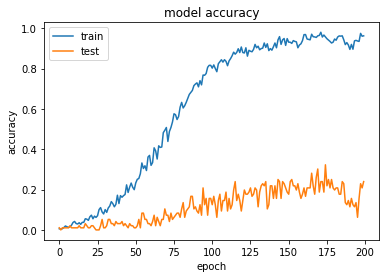

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## MOBILENET V2

In [ ]:
model2 = MobileNetV2(include_top =True, weights = None, classes = 109, input_shape = (224,224,3))

In [ ]:
model2.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/mobilenetv2_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=200)

Epoch 1/200
16/16 [==============================] - 31s 2s/step - loss: 5.4148 - acc: 0.0040 - val_loss: 4.6912 - val_acc: 0.0104
Epoch 2/200
16/16 [==============================] - 13s 798ms/step - loss: 5.0436 - acc: 0.0099 - val_loss: 4.6911 - val_acc: 0.0104
Epoch 3/200
16/16 [==============================] - 12s 772ms/step - loss: 4.9502 - acc: 0.0059 - val_loss: 4.6909 - val_acc: 0.0104
Epoch 4/200
16/16 [==============================] - 12s 735ms/step - loss: 4.8023 - acc: 0.0099 - val_loss: 4.6912 - val_acc: 0.0104
Epoch 5/200
16/16 [==============================] - 11s 718ms/step - loss: 4.7273 - acc: 0.0158 - val_loss: 4.6905 - val_acc: 0.0104
Epoch 6/200
16/16 [==============================] - 11s 703ms/step - loss: 4.6399 - acc: 0.0176 - val_loss: 4.6908 - val_acc: 0.0104
Epoch 7/200
16/16 [==============================] - 11s 670ms/step - loss: 4.5907 - acc: 0.0296 - val_loss: 4.6932 - val_acc: 0.0000e+00
Epoch 8/200
16/16 [==============================] - 10s 619m

16/16 [==============================] - 8s 482ms/step - loss: 2.5472 - acc: 0.3184 - val_loss: 5.5734 - val_acc: 0.0104
Epoch 36/200
16/16 [==============================] - 12s 729ms/step - loss: 2.4426 - acc: 0.3280 - val_loss: 5.5902 - val_acc: 0.0104
Epoch 37/200
16/16 [==============================] - 11s 676ms/step - loss: 2.2774 - acc: 0.3775 - val_loss: 5.6662 - val_acc: 0.0104
Epoch 38/200
16/16 [==============================] - 11s 667ms/step - loss: 2.2906 - acc: 0.3617 - val_loss: 5.7630 - val_acc: 0.0104
Epoch 39/200
16/16 [==============================] - 11s 666ms/step - loss: 2.3098 - acc: 0.3535 - val_loss: 5.8359 - val_acc: 0.0104
Epoch 40/200
16/16 [==============================] - 10s 631ms/step - loss: 2.2507 - acc: 0.3680 - val_loss: 5.9142 - val_acc: 0.0104
Epoch 41/200
16/16 [==============================] - 10s 615ms/step - loss: 2.2220 - acc: 0.3755 - val_loss: 6.0420 - val_acc: 0.0104
Epoch 42/200
16/16 [==============================] - 9s 592ms/step -

16/16 [==============================] - 11s 695ms/step - loss: 0.7394 - acc: 0.7747 - val_loss: 9.1859 - val_acc: 0.0104
Epoch 73/200
16/16 [==============================] - 11s 676ms/step - loss: 0.6500 - acc: 0.8164 - val_loss: 9.0466 - val_acc: 0.0104
Epoch 74/200
16/16 [==============================] - 10s 651ms/step - loss: 0.6732 - acc: 0.8220 - val_loss: 9.5452 - val_acc: 0.0104
Epoch 75/200
16/16 [==============================] - 10s 623ms/step - loss: 0.5831 - acc: 0.8340 - val_loss: 9.6442 - val_acc: 0.0104
Epoch 76/200
16/16 [==============================] - 10s 610ms/step - loss: 0.6091 - acc: 0.8260 - val_loss: 9.3329 - val_acc: 0.0104
Epoch 77/200
16/16 [==============================] - 10s 610ms/step - loss: 0.5163 - acc: 0.8735 - val_loss: 9.3572 - val_acc: 0.0104
Epoch 78/200
16/16 [==============================] - 9s 572ms/step - loss: 0.6483 - acc: 0.8145 - val_loss: 9.5521 - val_acc: 0.0104
Epoch 79/200
16/16 [==============================] - 9s 563ms/step -

16/16 [==============================] - 11s 666ms/step - loss: 0.3316 - acc: 0.9170 - val_loss: 14.4575 - val_acc: 0.0104
Epoch 109/200
16/16 [==============================] - 11s 657ms/step - loss: 0.2350 - acc: 0.9375 - val_loss: 14.3949 - val_acc: 0.0104
Epoch 110/200
16/16 [==============================] - 10s 631ms/step - loss: 0.2262 - acc: 0.9407 - val_loss: 14.2458 - val_acc: 0.0104
Epoch 111/200
16/16 [==============================] - 10s 610ms/step - loss: 0.2446 - acc: 0.9249 - val_loss: 14.2968 - val_acc: 0.0104
Epoch 112/200
16/16 [==============================] - 10s 597ms/step - loss: 0.1857 - acc: 0.9486 - val_loss: 14.6512 - val_acc: 0.0104
Epoch 113/200
16/16 [==============================] - 9s 584ms/step - loss: 0.2019 - acc: 0.9486 - val_loss: 15.4803 - val_acc: 0.0104
Epoch 114/200
16/16 [==============================] - 9s 559ms/step - loss: 0.2195 - acc: 0.9387 - val_loss: 15.0738 - val_acc: 0.0104
Epoch 115/200
16/16 [==============================] - 9s

16/16 [==============================] - 10s 648ms/step - loss: 0.1338 - acc: 0.9625 - val_loss: 16.0648 - val_acc: 0.0104
Epoch 145/200
16/16 [==============================] - 10s 609ms/step - loss: 0.1353 - acc: 0.9660 - val_loss: 17.9142 - val_acc: 0.0104
Epoch 146/200
16/16 [==============================] - 10s 603ms/step - loss: 0.1538 - acc: 0.9531 - val_loss: 16.9150 - val_acc: 0.0104
Epoch 147/200
16/16 [==============================] - 10s 596ms/step - loss: 0.1690 - acc: 0.9486 - val_loss: 18.4999 - val_acc: 0.0104
Epoch 148/200
16/16 [==============================] - 9s 574ms/step - loss: 0.1685 - acc: 0.9480 - val_loss: 17.8112 - val_acc: 0.0104
Epoch 149/200
16/16 [==============================] - 9s 564ms/step - loss: 0.1791 - acc: 0.9590 - val_loss: 16.9487 - val_acc: 0.0104
Epoch 150/200
16/16 [==============================] - 9s 544ms/step - loss: 0.1907 - acc: 0.9506 - val_loss: 16.6556 - val_acc: 0.0104
Epoch 151/200
16/16 [==============================] - 8s 

16/16 [==============================] - 10s 637ms/step - loss: 0.1618 - acc: 0.9375 - val_loss: 13.7817 - val_acc: 0.0104
Epoch 181/200
16/16 [==============================] - 10s 620ms/step - loss: 0.1825 - acc: 0.9460 - val_loss: 12.7795 - val_acc: 0.0104
Epoch 182/200
16/16 [==============================] - 9s 593ms/step - loss: 0.1822 - acc: 0.9473 - val_loss: 14.5212 - val_acc: 0.0104
Epoch 183/200
16/16 [==============================] - 9s 574ms/step - loss: 0.1636 - acc: 0.9440 - val_loss: 14.3318 - val_acc: 0.0104
Epoch 184/200
16/16 [==============================] - 9s 550ms/step - loss: 0.1948 - acc: 0.9492 - val_loss: 14.2990 - val_acc: 0.0104
Epoch 185/200
16/16 [==============================] - 9s 550ms/step - loss: 0.1893 - acc: 0.9387 - val_loss: 14.1754 - val_acc: 0.0104
Epoch 186/200
16/16 [==============================] - 9s 555ms/step - loss: 0.1647 - acc: 0.9526 - val_loss: 12.9987 - val_acc: 0.0104
Epoch 187/200
16/16 [==============================] - 9s 55

In [ ]:
with open("./result_mobilenet.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

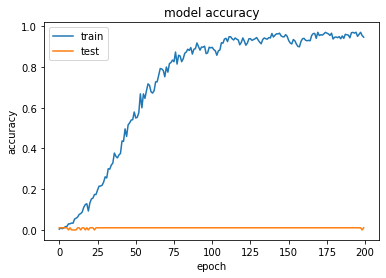

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## VGG16

In [ ]:
model3 = VGG16(include_top =True, weights = None, classes = 109, input_shape = (224,224,3))

In [ ]:
model3.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/vgg16_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model3.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=200)

Epoch 1/200
16/16 [==============================] - 38s 2s/step - loss: 4.7100 - acc: 0.0040 - val_loss: 4.6911 - val_acc: 0.0104
Epoch 2/200
16/16 [==============================] - 20s 1s/step - loss: 4.6938 - acc: 0.0059 - val_loss: 4.6906 - val_acc: 0.0104
Epoch 3/200
16/16 [==============================] - 20s 1s/step - loss: 4.6921 - acc: 0.0000e+00 - val_loss: 4.6906 - val_acc: 0.0104
Epoch 4/200
16/16 [==============================] - 20s 1s/step - loss: 4.6917 - acc: 0.0040 - val_loss: 4.6899 - val_acc: 0.0104
Epoch 5/200
16/16 [==============================] - 19s 1s/step - loss: 4.6917 - acc: 0.0040 - val_loss: 4.6899 - val_acc: 0.0104
Epoch 6/200
16/16 [==============================] - 19s 1s/step - loss: 4.6912 - acc: 0.0020 - val_loss: 4.6895 - val_acc: 0.0104
Epoch 7/200
16/16 [==============================] - 19s 1s/step - loss: 4.6915 - acc: 0.0098 - val_loss: 4.6893 - val_acc: 0.0104
Epoch 8/200
16/16 [==============================] - 19s 1s/step - loss: 4.6906

Epoch 38/200
16/16 [==============================] - 19s 1s/step - loss: 4.6876 - acc: 0.0040 - val_loss: 4.6808 - val_acc: 0.0104
Epoch 39/200
16/16 [==============================] - 19s 1s/step - loss: 4.6898 - acc: 0.0020 - val_loss: 4.6816 - val_acc: 0.0104
Epoch 40/200
16/16 [==============================] - 19s 1s/step - loss: 4.6860 - acc: 0.0059 - val_loss: 4.6806 - val_acc: 0.0104
Epoch 41/200
16/16 [==============================] - 19s 1s/step - loss: 4.6886 - acc: 0.0040 - val_loss: 4.6804 - val_acc: 0.0104
Epoch 42/200
16/16 [==============================] - 19s 1s/step - loss: 4.6866 - acc: 0.0079 - val_loss: 4.6804 - val_acc: 0.0104
Epoch 43/200
16/16 [==============================] - 18s 1s/step - loss: 4.6917 - acc: 0.0020 - val_loss: 4.6811 - val_acc: 0.0104
Epoch 44/200
16/16 [==============================] - 18s 1s/step - loss: 4.6842 - acc: 0.0040 - val_loss: 4.6803 - val_acc: 0.0104
Epoch 45/200
16/16 [==============================] - 18s 1s/step - loss: 4.

16/16 [==============================] - 19s 1s/step - loss: 4.6855 - acc: 0.0000e+00 - val_loss: 4.6791 - val_acc: 0.0104
Epoch 76/200
16/16 [==============================] - 19s 1s/step - loss: 4.6886 - acc: 0.0000e+00 - val_loss: 4.6795 - val_acc: 0.0104
Epoch 77/200
16/16 [==============================] - 18s 1s/step - loss: 4.6877 - acc: 0.0059 - val_loss: 4.6796 - val_acc: 0.0104
Epoch 78/200
16/16 [==============================] - 18s 1s/step - loss: 4.6885 - acc: 0.0060 - val_loss: 4.6800 - val_acc: 0.0104
Epoch 79/200
16/16 [==============================] - 18s 1s/step - loss: 4.6880 - acc: 0.0039 - val_loss: 4.6796 - val_acc: 0.0104
Epoch 80/200
16/16 [==============================] - 18s 1s/step - loss: 4.6887 - acc: 0.0020 - val_loss: 4.6801 - val_acc: 0.0104
Epoch 81/200
16/16 [==============================] - 18s 1s/step - loss: 4.6874 - acc: 0.0000e+00 - val_loss: 4.6801 - val_acc: 0.0104
Epoch 82/200
16/16 [==============================] - 17s 1s/step - loss: 4.6

16/16 [==============================] - 18s 1s/step - loss: 4.6845 - acc: 0.0040 - val_loss: 4.6791 - val_acc: 0.0104
Epoch 112/200
16/16 [==============================] - 18s 1s/step - loss: 4.6916 - acc: 0.0000e+00 - val_loss: 4.6792 - val_acc: 0.0104
Epoch 113/200
16/16 [==============================] - 18s 1s/step - loss: 4.6837 - acc: 0.0059 - val_loss: 4.6795 - val_acc: 0.0104
Epoch 114/200
16/16 [==============================] - 18s 1s/step - loss: 4.6901 - acc: 0.0040 - val_loss: 4.6797 - val_acc: 0.0104
Epoch 115/200
16/16 [==============================] - 18s 1s/step - loss: 4.6910 - acc: 0.0020 - val_loss: 4.6808 - val_acc: 0.0104
Epoch 116/200
16/16 [==============================] - 17s 1s/step - loss: 4.6858 - acc: 0.0099 - val_loss: 4.6805 - val_acc: 0.0104
Epoch 117/200
16/16 [==============================] - 17s 1s/step - loss: 4.6861 - acc: 0.0020 - val_loss: 4.6799 - val_acc: 0.0104
Epoch 118/200
16/16 [==============================] - 17s 1s/step - loss: 4.68

Epoch 148/200
16/16 [==============================] - 18s 1s/step - loss: 4.6873 - acc: 0.0020 - val_loss: 4.6797 - val_acc: 0.0104
Epoch 149/200
16/16 [==============================] - 17s 1s/step - loss: 4.6881 - acc: 0.0040 - val_loss: 4.6797 - val_acc: 0.0000e+00
Epoch 150/200
16/16 [==============================] - 17s 1s/step - loss: 4.6862 - acc: 0.0078 - val_loss: 4.6795 - val_acc: 0.0104
Epoch 151/200
16/16 [==============================] - 17s 1s/step - loss: 4.6888 - acc: 0.0020 - val_loss: 4.6792 - val_acc: 0.0104
Epoch 152/200
16/16 [==============================] - 17s 1s/step - loss: 4.6870 - acc: 0.0079 - val_loss: 4.6793 - val_acc: 0.0104
Epoch 153/200
16/16 [==============================] - 17s 1s/step - loss: 4.6872 - acc: 0.0040 - val_loss: 4.6799 - val_acc: 0.0104
Epoch 154/200
16/16 [==============================] - 16s 1s/step - loss: 4.6874 - acc: 0.0020 - val_loss: 4.6794 - val_acc: 0.0104
Epoch 155/200
16/16 [==============================] - 20s 1s/ste

16/16 [==============================] - 17s 1s/step - loss: 4.6871 - acc: 0.0060 - val_loss: 4.6797 - val_acc: 0.0000e+00
Epoch 185/200
16/16 [==============================] - 17s 1s/step - loss: 4.6870 - acc: 0.0039 - val_loss: 4.6794 - val_acc: 0.0104
Epoch 186/200
16/16 [==============================] - 17s 1s/step - loss: 4.6902 - acc: 0.0020 - val_loss: 4.6797 - val_acc: 0.0104
Epoch 187/200
16/16 [==============================] - 16s 1s/step - loss: 4.6850 - acc: 0.0020 - val_loss: 4.6797 - val_acc: 0.0104
Epoch 188/200
16/16 [==============================] - 16s 1s/step - loss: 4.6875 - acc: 0.0059 - val_loss: 4.6789 - val_acc: 0.0104
Epoch 189/200
16/16 [==============================] - 20s 1s/step - loss: 4.6875 - acc: 0.0079 - val_loss: 4.6793 - val_acc: 0.0104
Epoch 190/200
16/16 [==============================] - 20s 1s/step - loss: 4.6860 - acc: 0.0119 - val_loss: 4.6791 - val_acc: 0.0104
Epoch 191/200
16/16 [==============================] - 19s 1s/step - loss: 4.68

In [ ]:
with open("./result_vgg16.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

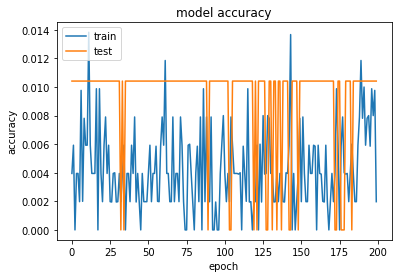

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## INCEPTIONRESNETV2

In [ ]:
model4 = InceptionResNetV2(include_top =True, weights = None, classes = 109, input_shape = (224,224,3))

In [ ]:
model4.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/inception_resnet_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model4.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=200)

Epoch 1/200
16/16 [==============================] - 75s 5s/step - loss: 5.3860 - acc: 0.0098 - val_loss: 6.9011 - val_acc: 0.0104
Epoch 2/200
16/16 [==============================] - 15s 908ms/step - loss: 4.7587 - acc: 0.0280 - val_loss: 4.8409 - val_acc: 0.0104
Epoch 3/200
16/16 [==============================] - 14s 869ms/step - loss: 4.6430 - acc: 0.0336 - val_loss: 6.5279 - val_acc: 0.0104
Epoch 4/200
16/16 [==============================] - 14s 860ms/step - loss: 4.4910 - acc: 0.0277 - val_loss: 5.6236 - val_acc: 0.0104
Epoch 5/200
16/16 [==============================] - 14s 848ms/step - loss: 4.4094 - acc: 0.0514 - val_loss: 5.5624 - val_acc: 0.0000e+00
Epoch 6/200
16/16 [==============================] - 13s 836ms/step - loss: 4.3775 - acc: 0.0435 - val_loss: 5.1777 - val_acc: 0.0104
Epoch 7/200
16/16 [==============================] - 13s 840ms/step - loss: 4.2152 - acc: 0.0391 - val_loss: 5.1501 - val_acc: 0.0104
Epoch 8/200
16/16 [==============================] - 13s 828m

16/16 [==============================] - 14s 883ms/step - loss: 1.0084 - acc: 0.7207 - val_loss: 5.3507 - val_acc: 0.1146
Epoch 38/200
16/16 [==============================] - 14s 853ms/step - loss: 0.8678 - acc: 0.7800 - val_loss: 4.2101 - val_acc: 0.1771
Epoch 39/200
16/16 [==============================] - 14s 856ms/step - loss: 0.8588 - acc: 0.7617 - val_loss: 4.1245 - val_acc: 0.2083
Epoch 40/200
16/16 [==============================] - 14s 852ms/step - loss: 0.8174 - acc: 0.7800 - val_loss: 3.8899 - val_acc: 0.2083
Epoch 41/200
16/16 [==============================] - 13s 831ms/step - loss: 0.6558 - acc: 0.8281 - val_loss: 3.9697 - val_acc: 0.1667
Epoch 42/200
16/16 [==============================] - 13s 822ms/step - loss: 0.5658 - acc: 0.8560 - val_loss: 4.2570 - val_acc: 0.1250
Epoch 43/200
16/16 [==============================] - 13s 828ms/step - loss: 0.5891 - acc: 0.8242 - val_loss: 3.9700 - val_acc: 0.1875
Epoch 44/200
16/16 [==============================] - 13s 819ms/step

16/16 [==============================] - 14s 858ms/step - loss: 0.1165 - acc: 0.9743 - val_loss: 3.9071 - val_acc: 0.2604
Epoch 75/200
16/16 [==============================] - 13s 828ms/step - loss: 0.1220 - acc: 0.9763 - val_loss: 4.2861 - val_acc: 0.2812
Epoch 76/200
16/16 [==============================] - 13s 822ms/step - loss: 0.1855 - acc: 0.9492 - val_loss: 4.0690 - val_acc: 0.3021
Epoch 77/200
16/16 [==============================] - 13s 819ms/step - loss: 0.1597 - acc: 0.9720 - val_loss: 4.3258 - val_acc: 0.2396
Epoch 78/200
16/16 [==============================] - 13s 819ms/step - loss: 0.1385 - acc: 0.9590 - val_loss: 4.5209 - val_acc: 0.2708
Epoch 79/200
16/16 [==============================] - 13s 801ms/step - loss: 0.1148 - acc: 0.9842 - val_loss: 4.2114 - val_acc: 0.2604
Epoch 80/200
16/16 [==============================] - 13s 797ms/step - loss: 0.1278 - acc: 0.9783 - val_loss: 3.7867 - val_acc: 0.2917
Epoch 81/200
16/16 [==============================] - 13s 787ms/step

16/16 [==============================] - 13s 837ms/step - loss: 0.1114 - acc: 0.9707 - val_loss: 5.0361 - val_acc: 0.2708
Epoch 111/200
16/16 [==============================] - 13s 830ms/step - loss: 0.1634 - acc: 0.9620 - val_loss: 5.7066 - val_acc: 0.2292
Epoch 112/200
16/16 [==============================] - 13s 803ms/step - loss: 0.1132 - acc: 0.9746 - val_loss: 4.4318 - val_acc: 0.2708
Epoch 113/200
16/16 [==============================] - 13s 800ms/step - loss: 0.0797 - acc: 0.9862 - val_loss: 4.5715 - val_acc: 0.2708
Epoch 114/200
16/16 [==============================] - 13s 811ms/step - loss: 0.0668 - acc: 0.9862 - val_loss: 3.7915 - val_acc: 0.3229
Epoch 115/200
16/16 [==============================] - 13s 784ms/step - loss: 0.0763 - acc: 0.9842 - val_loss: 4.3619 - val_acc: 0.3542
Epoch 116/200
16/16 [==============================] - 13s 803ms/step - loss: 0.0756 - acc: 0.9802 - val_loss: 4.0473 - val_acc: 0.3229
Epoch 117/200
16/16 [==============================] - 13s 783

Epoch 147/200
16/16 [==============================] - 13s 807ms/step - loss: 0.0574 - acc: 0.9840 - val_loss: 4.2778 - val_acc: 0.2812
Epoch 148/200
16/16 [==============================] - 13s 790ms/step - loss: 0.0450 - acc: 0.9902 - val_loss: 4.2045 - val_acc: 0.3229
Epoch 149/200
16/16 [==============================] - 13s 786ms/step - loss: 0.0278 - acc: 0.9980 - val_loss: 4.0252 - val_acc: 0.3333
Epoch 150/200
16/16 [==============================] - 13s 792ms/step - loss: 0.0303 - acc: 0.9980 - val_loss: 3.7988 - val_acc: 0.3333
Epoch 151/200
16/16 [==============================] - 12s 771ms/step - loss: 0.0302 - acc: 0.9941 - val_loss: 3.8341 - val_acc: 0.3542
Epoch 152/200
16/16 [==============================] - 12s 772ms/step - loss: 0.0446 - acc: 0.9881 - val_loss: 4.3488 - val_acc: 0.3333
Epoch 153/200
16/16 [==============================] - 12s 751ms/step - loss: 0.0280 - acc: 0.9980 - val_loss: 3.7871 - val_acc: 0.3438
Epoch 154/200
16/16 [===========================

16/16 [==============================] - 13s 796ms/step - loss: 0.0459 - acc: 0.9881 - val_loss: 4.1891 - val_acc: 0.3750
Epoch 184/200
16/16 [==============================] - 13s 818ms/step - loss: 0.0375 - acc: 0.9883 - val_loss: 4.5092 - val_acc: 0.3229
Epoch 185/200
16/16 [==============================] - 12s 770ms/step - loss: 0.0649 - acc: 0.9862 - val_loss: 4.7238 - val_acc: 0.2812
Epoch 186/200
16/16 [==============================] - 12s 768ms/step - loss: 0.0697 - acc: 0.9862 - val_loss: 4.4700 - val_acc: 0.3229
Epoch 187/200
16/16 [==============================] - 12s 766ms/step - loss: 0.0456 - acc: 0.9822 - val_loss: 4.1611 - val_acc: 0.3854
Epoch 188/200
16/16 [==============================] - 12s 728ms/step - loss: 0.0376 - acc: 0.9921 - val_loss: 4.2758 - val_acc: 0.3229
Epoch 189/200
16/16 [==============================] - 14s 893ms/step - loss: 0.0722 - acc: 0.9802 - val_loss: 3.8588 - val_acc: 0.3542
Epoch 190/200
16/16 [==============================] - 14s 890

In [ ]:
with open("./result_inception_resnet.txt",'w') as f:
    for k in history.history.keys():
        print(k,file=f)
        for i in history.history[k]:
            print(i,file=f)

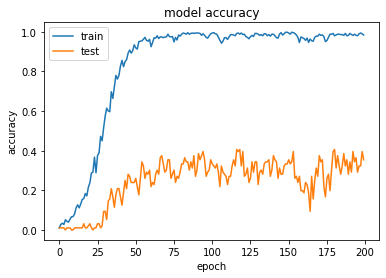

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model4.save("INCEPTION_RESNET")

In [ ]:
model4.save("Inceptionresnet.h5")

## .h5 to ONNX

In [ ]:
import numpy as np
import keras2onnx
import onnxruntime

In [ ]:
onnx_model4 = keras2onnx.convert_keras(model4, model4.name)

The ONNX operator number change on the optimization: 1986 -> 622


In [ ]:
temp_model_file = 'INCEPTION_RESNET.onnx'
keras2onnx.save_model(onnx_model4, temp_model_file)
sess = onnxruntime.InferenceSession(temp_model_file)

## INCEPTION RESNET - Transfer Learning

In [ ]:
model5 = InceptionResNetV2(include_top =False, weights = 'imagenet', input_shape = (224,224,3))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of d19885ff4a710c122648d3b5c3b684e4 so we will re-download the data.
219062272/219055592 [==============================] - 362s 2us/step


In [ ]:
for ix in range(768):
    model5.layers[ix].trainable = False

In [ ]:
x=model5.output
# Add some new Fully connected layers
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
x = Dropout(0.3)(x)
x=Dense(256,activation='relu')(x) 
x=Dense(256,activation='relu')(x) 
preds=Dense(109, activation='softmax')(x) #final layer with softmax activation

model_new=Model(inputs=model5.input,outputs=preds)



In [ ]:
model_new.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/inception_resnet_tl_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model_new.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=200)

Epoch 1/200
16/16 [==============================] - 144s 9s/step - loss: 4.8033 - acc: 0.0158 - val_loss: 4.7106 - val_acc: 0.0104
Epoch 2/200
16/16 [==============================] - 20s 1s/step - loss: 4.7245 - acc: 0.0059 - val_loss: 4.6868 - val_acc: 0.0104
Epoch 3/200
16/16 [==============================] - 17s 1s/step - loss: 4.6999 - acc: 0.0079 - val_loss: 4.6875 - val_acc: 0.0104
Epoch 4/200
16/16 [==============================] - 17s 1s/step - loss: 4.6932 - acc: 0.0079 - val_loss: 4.6886 - val_acc: 0.0104
Epoch 5/200
16/16 [==============================] - 17s 1s/step - loss: 4.6897 - acc: 0.0020 - val_loss: 4.6911 - val_acc: 0.0208
Epoch 6/200
16/16 [==============================] - 17s 1s/step - loss: 4.6971 - acc: 0.0059 - val_loss: 4.6926 - val_acc: 0.0104
Epoch 7/200
16/16 [==============================] - 17s 1s/step - loss: 4.6929 - acc: 0.0040 - val_loss: 4.6835 - val_acc: 0.0104
Epoch 8/200
16/16 [==============================] - 17s 1s/step - loss: 4.6946 - 

Epoch 38/200
16/16 [==============================] - 15s 954ms/step - loss: 4.1449 - acc: 0.0296 - val_loss: 4.5259 - val_acc: 0.0000e+00
Epoch 39/200
16/16 [==============================] - 16s 977ms/step - loss: 4.1704 - acc: 0.0156 - val_loss: 4.6558 - val_acc: 0.0104
Epoch 40/200
16/16 [==============================] - 15s 961ms/step - loss: 4.0925 - acc: 0.0336 - val_loss: 4.6989 - val_acc: 0.0417
Epoch 41/200
16/16 [==============================] - 15s 960ms/step - loss: 4.1513 - acc: 0.0257 - val_loss: 4.3217 - val_acc: 0.0208
Epoch 42/200
16/16 [==============================] - 15s 967ms/step - loss: 4.1056 - acc: 0.0198 - val_loss: 4.6646 - val_acc: 0.0208
Epoch 43/200
16/16 [==============================] - 15s 945ms/step - loss: 4.0712 - acc: 0.0277 - val_loss: 4.3686 - val_acc: 0.0208
Epoch 44/200
16/16 [==============================] - 16s 970ms/step - loss: 4.1168 - acc: 0.0178 - val_loss: 4.2424 - val_acc: 0.0104
Epoch 45/200
16/16 [==============================]

16/16 [==============================] - 15s 948ms/step - loss: 3.8044 - acc: 0.0469 - val_loss: 7.4668 - val_acc: 0.0208
Epoch 75/200
16/16 [==============================] - 15s 965ms/step - loss: 3.7622 - acc: 0.0336 - val_loss: 7.2891 - val_acc: 0.0208
Epoch 76/200
16/16 [==============================] - 15s 964ms/step - loss: 3.7962 - acc: 0.0340 - val_loss: 7.9966 - val_acc: 0.0312
Epoch 77/200
16/16 [==============================] - 15s 954ms/step - loss: 3.7948 - acc: 0.0415 - val_loss: 4.7649 - val_acc: 0.0417
Epoch 78/200
16/16 [==============================] - 15s 944ms/step - loss: 3.8208 - acc: 0.0356 - val_loss: 4.8490 - val_acc: 0.0417
Epoch 79/200
16/16 [==============================] - 15s 953ms/step - loss: 3.7676 - acc: 0.0395 - val_loss: 4.3625 - val_acc: 0.0521
Epoch 80/200
16/16 [==============================] - 15s 966ms/step - loss: 3.7777 - acc: 0.0527 - val_loss: 4.4821 - val_acc: 0.0312
Epoch 81/200
16/16 [==============================] - 16s 977ms/step

Epoch 111/200
16/16 [==============================] - 15s 960ms/step - loss: 3.5448 - acc: 0.0720 - val_loss: 4.6366 - val_acc: 0.0312
Epoch 112/200
16/16 [==============================] - 15s 964ms/step - loss: 3.5367 - acc: 0.0449 - val_loss: 4.6356 - val_acc: 0.0417
Epoch 113/200
16/16 [==============================] - 15s 959ms/step - loss: 3.4614 - acc: 0.0692 - val_loss: 4.7456 - val_acc: 0.0312
Epoch 114/200
16/16 [==============================] - 15s 968ms/step - loss: 3.5670 - acc: 0.0850 - val_loss: 4.8615 - val_acc: 0.0312
Epoch 115/200
16/16 [==============================] - 15s 964ms/step - loss: 3.4724 - acc: 0.0711 - val_loss: 5.0921 - val_acc: 0.0312
Epoch 116/200
16/16 [==============================] - 15s 950ms/step - loss: 3.5665 - acc: 0.0751 - val_loss: 4.8407 - val_acc: 0.0625
Epoch 117/200
16/16 [==============================] - 15s 966ms/step - loss: 3.5081 - acc: 0.0711 - val_loss: 4.6351 - val_acc: 0.0312
Epoch 118/200
16/16 [===========================

16/16 [==============================] - 15s 960ms/step - loss: 3.3200 - acc: 0.1060 - val_loss: 5.2334 - val_acc: 0.0312
Epoch 148/200
16/16 [==============================] - 15s 961ms/step - loss: 3.4064 - acc: 0.0791 - val_loss: 4.9508 - val_acc: 0.0729
Epoch 149/200
16/16 [==============================] - 15s 951ms/step - loss: 3.3404 - acc: 0.1016 - val_loss: 4.6957 - val_acc: 0.0729
Epoch 150/200
16/16 [==============================] - 15s 945ms/step - loss: 3.3378 - acc: 0.0889 - val_loss: 5.1437 - val_acc: 0.0729
Epoch 151/200
16/16 [==============================] - 15s 960ms/step - loss: 3.3743 - acc: 0.1126 - val_loss: 5.8161 - val_acc: 0.0625
Epoch 152/200
16/16 [==============================] - 15s 950ms/step - loss: 3.3009 - acc: 0.1047 - val_loss: 5.2658 - val_acc: 0.0312
Epoch 153/200
16/16 [==============================] - 15s 965ms/step - loss: 3.4868 - acc: 0.0810 - val_loss: 5.6350 - val_acc: 0.0521
Epoch 154/200
16/16 [==============================] - 15s 942

Epoch 184/200
16/16 [==============================] - 16s 971ms/step - loss: 3.1788 - acc: 0.1067 - val_loss: 5.0662 - val_acc: 0.0729
Epoch 185/200
16/16 [==============================] - 15s 953ms/step - loss: 3.1090 - acc: 0.1107 - val_loss: 5.8866 - val_acc: 0.0521
Epoch 186/200
16/16 [==============================] - 15s 958ms/step - loss: 3.1259 - acc: 0.0949 - val_loss: 5.8638 - val_acc: 0.0312
Epoch 187/200
16/16 [==============================] - 15s 950ms/step - loss: 3.1163 - acc: 0.1225 - val_loss: 5.3772 - val_acc: 0.0729
Epoch 188/200
16/16 [==============================] - 15s 938ms/step - loss: 3.1053 - acc: 0.1225 - val_loss: 5.5787 - val_acc: 0.0521
Epoch 189/200
16/16 [==============================] - 15s 961ms/step - loss: 3.0408 - acc: 0.1383 - val_loss: 4.9685 - val_acc: 0.0625
Epoch 190/200
16/16 [==============================] - 15s 942ms/step - loss: 3.0684 - acc: 0.1462 - val_loss: 5.7047 - val_acc: 0.0417
Epoch 191/200
16/16 [===========================

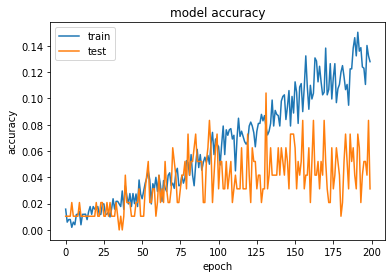

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# LBP PROCESSED DATA

In [ ]:
path = "./DATA_updated_lbp"

In [ ]:
import cv2 as cv
%load_ext tensorboard

import numpy as np
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *


from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
train_datagen=ImageDataGenerator(
    validation_split=0.2, 
    rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    brightness_range=[0.3,1.0],
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=False
    )


train_generator=train_datagen.flow_from_directory(path,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 color_mode="grayscale",
                                                 shuffle=True,
                                                 subset='training')


validation_generator = train_datagen.flow_from_directory(
                                                path, # same directory as training data
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                color_mode="grayscale",
                                                shuffle=True,
                                                subset='validation') # set as validation data

Found 2147 images belonging to 109 classes.
Found 429 images belonging to 109 classes.


In [ ]:
model6 = InceptionResNetV2(include_top =True, weights = None, classes = 109, input_shape = (224,224,1))

In [ ]:
model6.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [ ]:
log_dir = "logs_major_project/inception_resnet_LBP1000_fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history=model6.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [tensorboard_callback],
                    epochs=1000)

Epoch 1/1000
67/67 [==============================] - 112s 2s/step - loss: 5.1388 - acc: 0.0066 - val_loss: 4.7731 - val_acc: 0.0096
Epoch 2/1000
67/67 [==============================] - 49s 729ms/step - loss: 4.7547 - acc: 0.0085 - val_loss: 4.7073 - val_acc: 0.0096
Epoch 3/1000
67/67 [==============================] - 48s 723ms/step - loss: 4.7431 - acc: 0.0095 - val_loss: 4.6936 - val_acc: 0.0096
Epoch 4/1000
67/67 [==============================] - 49s 734ms/step - loss: 4.7544 - acc: 0.0090 - val_loss: 30.2651 - val_acc: 0.0048
Epoch 5/1000
67/67 [==============================] - 49s 736ms/step - loss: 4.7440 - acc: 0.0113 - val_loss: 4.6875 - val_acc: 0.0072
Epoch 6/1000
67/67 [==============================] - 49s 729ms/step - loss: 4.7291 - acc: 0.0113 - val_loss: 61.8573 - val_acc: 0.0168
Epoch 7/1000
67/67 [==============================] - 49s 727ms/step - loss: 4.7107 - acc: 0.0142 - val_loss: 4.6942 - val_acc: 0.0096
Epoch 8/1000
67/67 [==============================] - 4

67/67 [==============================] - 49s 726ms/step - loss: 4.6656 - acc: 0.0149 - val_loss: 4.6748 - val_acc: 0.0144
Epoch 38/1000
67/67 [==============================] - 48s 722ms/step - loss: 4.6784 - acc: 0.0184 - val_loss: 4.7133 - val_acc: 0.0048
Epoch 39/1000
67/67 [==============================] - 49s 729ms/step - loss: 4.6681 - acc: 0.0180 - val_loss: 5.0174 - val_acc: 0.0144
Epoch 40/1000
67/67 [==============================] - 49s 725ms/step - loss: 4.6790 - acc: 0.0161 - val_loss: 4.6429 - val_acc: 0.0216
Epoch 41/1000
67/67 [==============================] - 48s 723ms/step - loss: 4.6628 - acc: 0.0203 - val_loss: 4.6118 - val_acc: 0.0312
Epoch 42/1000
67/67 [==============================] - 48s 721ms/step - loss: 4.6493 - acc: 0.0213 - val_loss: 4.6423 - val_acc: 0.0264
Epoch 43/1000
67/67 [==============================] - 49s 727ms/step - loss: 4.6515 - acc: 0.0240 - val_loss: 4.5833 - val_acc: 0.0288
Epoch 44/1000
67/67 [==============================] - 49s 727

67/67 [==============================] - 48s 722ms/step - loss: 4.4985 - acc: 0.0312 - val_loss: 4.6205 - val_acc: 0.0264
Epoch 74/1000
67/67 [==============================] - 48s 719ms/step - loss: 4.5392 - acc: 0.0254 - val_loss: 4.5476 - val_acc: 0.0288
Epoch 75/1000
67/67 [==============================] - 48s 723ms/step - loss: 4.4964 - acc: 0.0274 - val_loss: 4.4884 - val_acc: 0.0288
Epoch 76/1000
67/67 [==============================] - 49s 729ms/step - loss: 4.4943 - acc: 0.0312 - val_loss: 4.4845 - val_acc: 0.0216
Epoch 77/1000
67/67 [==============================] - 48s 718ms/step - loss: 4.4998 - acc: 0.0251 - val_loss: 4.6723 - val_acc: 0.0264
Epoch 78/1000
67/67 [==============================] - 49s 728ms/step - loss: 4.4649 - acc: 0.0274 - val_loss: 4.7742 - val_acc: 0.0216
Epoch 79/1000
67/67 [==============================] - 49s 727ms/step - loss: 4.4629 - acc: 0.0271 - val_loss: 4.5466 - val_acc: 0.0312
Epoch 80/1000
67/67 [==============================] - 48s 723

67/67 [==============================] - 49s 727ms/step - loss: 4.2010 - acc: 0.0462 - val_loss: 4.2087 - val_acc: 0.0481
Epoch 110/1000
67/67 [==============================] - 49s 725ms/step - loss: 4.2062 - acc: 0.0508 - val_loss: 4.4167 - val_acc: 0.0433
Epoch 111/1000
67/67 [==============================] - 49s 727ms/step - loss: 4.1784 - acc: 0.0448 - val_loss: 4.2747 - val_acc: 0.0433
Epoch 112/1000
67/67 [==============================] - 48s 718ms/step - loss: 4.1967 - acc: 0.0513 - val_loss: 4.1745 - val_acc: 0.0625
Epoch 113/1000
67/67 [==============================] - 49s 731ms/step - loss: 4.1377 - acc: 0.0536 - val_loss: 5.3899 - val_acc: 0.0337
Epoch 114/1000
67/67 [==============================] - 49s 727ms/step - loss: 4.1487 - acc: 0.0515 - val_loss: 4.2883 - val_acc: 0.0409
Epoch 115/1000
67/67 [==============================] - 48s 719ms/step - loss: 4.1273 - acc: 0.0686 - val_loss: 4.1585 - val_acc: 0.0481
Epoch 116/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 727ms/step - loss: 3.5575 - acc: 0.1314 - val_loss: 3.8703 - val_acc: 0.0793
Epoch 146/1000
67/67 [==============================] - 49s 731ms/step - loss: 3.4353 - acc: 0.1518 - val_loss: 4.0908 - val_acc: 0.0769
Epoch 147/1000
67/67 [==============================] - 48s 720ms/step - loss: 3.5130 - acc: 0.1343 - val_loss: 3.8313 - val_acc: 0.0962
Epoch 148/1000
67/67 [==============================] - 49s 726ms/step - loss: 3.3851 - acc: 0.1593 - val_loss: 4.0117 - val_acc: 0.0841
Epoch 149/1000
67/67 [==============================] - 49s 730ms/step - loss: 3.4470 - acc: 0.1333 - val_loss: 3.8567 - val_acc: 0.0889
Epoch 150/1000
67/67 [==============================] - 48s 721ms/step - loss: 3.2748 - acc: 0.1674 - val_loss: 3.7209 - val_acc: 0.1178
Epoch 151/1000
67/67 [==============================] - 48s 723ms/step - loss: 3.2911 - acc: 0.1697 - val_loss: 3.9634 - val_acc: 0.0865
Epoch 152/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 728ms/step - loss: 1.6390 - acc: 0.5542 - val_loss: 3.1637 - val_acc: 0.2740
Epoch 182/1000
67/67 [==============================] - 48s 723ms/step - loss: 1.5392 - acc: 0.5787 - val_loss: 3.7366 - val_acc: 0.2139
Epoch 183/1000
67/67 [==============================] - 49s 725ms/step - loss: 1.4523 - acc: 0.5986 - val_loss: 3.7803 - val_acc: 0.2091
Epoch 184/1000
67/67 [==============================] - 49s 727ms/step - loss: 1.3318 - acc: 0.6465 - val_loss: 2.5692 - val_acc: 0.3606
Epoch 185/1000
67/67 [==============================] - 48s 724ms/step - loss: 1.3508 - acc: 0.6374 - val_loss: 3.2100 - val_acc: 0.2885
Epoch 186/1000
67/67 [==============================] - 48s 723ms/step - loss: 1.4241 - acc: 0.6285 - val_loss: 3.5125 - val_acc: 0.2692
Epoch 187/1000
67/67 [==============================] - 49s 729ms/step - loss: 1.2779 - acc: 0.6441 - val_loss: 2.5372 - val_acc: 0.3654
Epoch 188/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 718ms/step - loss: 0.8131 - acc: 0.8189 - val_loss: 2.2004 - val_acc: 0.4351
Epoch 218/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.8017 - acc: 0.8113 - val_loss: 2.6085 - val_acc: 0.4135
Epoch 219/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.7443 - acc: 0.8331 - val_loss: 3.1626 - val_acc: 0.3678
Epoch 220/1000
67/67 [==============================] - 49s 730ms/step - loss: 0.7492 - acc: 0.8194 - val_loss: 2.3044 - val_acc: 0.4832
Epoch 221/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.5989 - acc: 0.8591 - val_loss: 1.9729 - val_acc: 0.4856
Epoch 222/1000
67/67 [==============================] - 49s 732ms/step - loss: 0.6138 - acc: 0.8517 - val_loss: 1.8704 - val_acc: 0.5288
Epoch 223/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.9693 - acc: 0.7785 - val_loss: 3.0989 - val_acc: 0.3726
Epoch 224/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 720ms/step - loss: 0.5336 - acc: 0.8714 - val_loss: 1.8845 - val_acc: 0.5601
Epoch 254/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.5579 - acc: 0.8706 - val_loss: 3.0042 - val_acc: 0.3774
Epoch 255/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.6580 - acc: 0.8470 - val_loss: 2.3070 - val_acc: 0.4904
Epoch 256/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.5654 - acc: 0.8700 - val_loss: 3.2292 - val_acc: 0.3846
Epoch 257/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.5895 - acc: 0.8638 - val_loss: 3.4952 - val_acc: 0.3702
Epoch 258/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.6545 - acc: 0.8530 - val_loss: 2.0897 - val_acc: 0.4952
Epoch 259/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.6567 - acc: 0.8492 - val_loss: 2.4065 - val_acc: 0.4543
Epoch 260/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 725ms/step - loss: 0.5905 - acc: 0.8657 - val_loss: 1.9420 - val_acc: 0.5409
Epoch 290/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.5582 - acc: 0.8714 - val_loss: 2.1720 - val_acc: 0.4688
Epoch 291/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.6015 - acc: 0.8657 - val_loss: 2.0989 - val_acc: 0.5048
Epoch 292/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.5504 - acc: 0.8813 - val_loss: 3.4611 - val_acc: 0.3582
Epoch 293/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.6118 - acc: 0.8596 - val_loss: 2.4395 - val_acc: 0.4471
Epoch 294/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.5905 - acc: 0.8701 - val_loss: 2.1297 - val_acc: 0.5385
Epoch 295/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4719 - acc: 0.8979 - val_loss: 1.8064 - val_acc: 0.5577
Epoch 296/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 727ms/step - loss: 0.5481 - acc: 0.8766 - val_loss: 2.8644 - val_acc: 0.3798
Epoch 326/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.6224 - acc: 0.8709 - val_loss: 4.4221 - val_acc: 0.2380
Epoch 327/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.6122 - acc: 0.8571 - val_loss: 2.1284 - val_acc: 0.5288
Epoch 328/1000
67/67 [==============================] - 49s 731ms/step - loss: 0.4744 - acc: 0.8895 - val_loss: 1.5678 - val_acc: 0.6394
Epoch 329/1000
67/67 [==============================] - 49s 730ms/step - loss: 0.5827 - acc: 0.8835 - val_loss: 2.6963 - val_acc: 0.4880
Epoch 330/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.5458 - acc: 0.8773 - val_loss: 1.8151 - val_acc: 0.5721
Epoch 331/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.5305 - acc: 0.8821 - val_loss: 2.1501 - val_acc: 0.5216
Epoch 332/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 730ms/step - loss: 0.5551 - acc: 0.8809 - val_loss: 3.3273 - val_acc: 0.3582
Epoch 362/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.4954 - acc: 0.8867 - val_loss: 1.8670 - val_acc: 0.5673
Epoch 363/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4980 - acc: 0.8917 - val_loss: 2.8524 - val_acc: 0.3846
Epoch 364/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.4605 - acc: 0.8941 - val_loss: 2.0234 - val_acc: 0.5625
Epoch 365/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.5196 - acc: 0.8834 - val_loss: 1.7664 - val_acc: 0.6034
Epoch 366/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4608 - acc: 0.8984 - val_loss: 2.5183 - val_acc: 0.4615
Epoch 367/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4672 - acc: 0.9021 - val_loss: 2.7362 - val_acc: 0.4327
Epoch 368/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 724ms/step - loss: 0.4475 - acc: 0.8998 - val_loss: 1.8626 - val_acc: 0.5841
Epoch 398/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.6003 - acc: 0.8709 - val_loss: 1.7594 - val_acc: 0.5938
Epoch 399/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.4904 - acc: 0.8861 - val_loss: 1.9309 - val_acc: 0.5601
Epoch 400/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4575 - acc: 0.8955 - val_loss: 1.7064 - val_acc: 0.6010
Epoch 401/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4874 - acc: 0.8931 - val_loss: 1.9869 - val_acc: 0.5553
Epoch 402/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.5252 - acc: 0.8884 - val_loss: 2.5188 - val_acc: 0.4952
Epoch 403/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.5274 - acc: 0.8823 - val_loss: 2.4132 - val_acc: 0.4832
Epoch 404/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 725ms/step - loss: 0.5301 - acc: 0.8870 - val_loss: 3.6212 - val_acc: 0.3918
Epoch 434/1000
67/67 [==============================] - 49s 733ms/step - loss: 0.4618 - acc: 0.8960 - val_loss: 1.8027 - val_acc: 0.5697
Epoch 435/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4621 - acc: 0.8969 - val_loss: 1.9731 - val_acc: 0.5288
Epoch 436/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4765 - acc: 0.8993 - val_loss: 1.8440 - val_acc: 0.6010
Epoch 437/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.4892 - acc: 0.8960 - val_loss: 1.7930 - val_acc: 0.5962
Epoch 438/1000
67/67 [==============================] - 49s 730ms/step - loss: 0.4613 - acc: 0.8932 - val_loss: 2.1639 - val_acc: 0.5361
Epoch 439/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4713 - acc: 0.8945 - val_loss: 1.8955 - val_acc: 0.5721
Epoch 440/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 720ms/step - loss: 0.4509 - acc: 0.9022 - val_loss: 2.8534 - val_acc: 0.4471
Epoch 470/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.4678 - acc: 0.8932 - val_loss: 2.4709 - val_acc: 0.5216
Epoch 471/1000
67/67 [==============================] - 48s 718ms/step - loss: 0.6088 - acc: 0.8733 - val_loss: 2.5624 - val_acc: 0.5072
Epoch 472/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4662 - acc: 0.8979 - val_loss: 2.8271 - val_acc: 0.4712
Epoch 473/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.7140 - acc: 0.8657 - val_loss: 1.7374 - val_acc: 0.5433
Epoch 474/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4668 - acc: 0.8936 - val_loss: 1.6200 - val_acc: 0.5913
Epoch 475/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4680 - acc: 0.8998 - val_loss: 2.0161 - val_acc: 0.5625
Epoch 476/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 732ms/step - loss: 0.4825 - acc: 0.9012 - val_loss: 2.7417 - val_acc: 0.4904
Epoch 506/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.4544 - acc: 0.8965 - val_loss: 1.7774 - val_acc: 0.5769
Epoch 507/1000
67/67 [==============================] - 49s 730ms/step - loss: 0.4335 - acc: 0.9053 - val_loss: 1.5848 - val_acc: 0.5938
Epoch 508/1000
67/67 [==============================] - 49s 732ms/step - loss: 0.4610 - acc: 0.8998 - val_loss: 1.5118 - val_acc: 0.6322
Epoch 509/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4279 - acc: 0.9062 - val_loss: 1.6267 - val_acc: 0.6058
Epoch 510/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4422 - acc: 0.9002 - val_loss: 1.9521 - val_acc: 0.5721
Epoch 511/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.4827 - acc: 0.8955 - val_loss: 2.1656 - val_acc: 0.5409
Epoch 512/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 724ms/step - loss: 0.4473 - acc: 0.9007 - val_loss: 1.7974 - val_acc: 0.5769
Epoch 542/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4902 - acc: 0.8936 - val_loss: 2.5485 - val_acc: 0.5024
Epoch 543/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.5028 - acc: 0.8960 - val_loss: 2.5870 - val_acc: 0.4663
Epoch 544/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4640 - acc: 0.8946 - val_loss: 1.5676 - val_acc: 0.6082
Epoch 545/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4780 - acc: 0.8946 - val_loss: 1.8713 - val_acc: 0.5337
Epoch 546/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4464 - acc: 0.9012 - val_loss: 1.7596 - val_acc: 0.5745
Epoch 547/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4321 - acc: 0.9040 - val_loss: 1.8238 - val_acc: 0.5938
Epoch 548/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 724ms/step - loss: 0.4369 - acc: 0.9032 - val_loss: 1.9367 - val_acc: 0.5697
Epoch 578/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4187 - acc: 0.9090 - val_loss: 1.4931 - val_acc: 0.6346
Epoch 579/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.5175 - acc: 0.8883 - val_loss: 2.0838 - val_acc: 0.5529
Epoch 580/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.4531 - acc: 0.8988 - val_loss: 1.5195 - val_acc: 0.6274
Epoch 581/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4231 - acc: 0.9026 - val_loss: 1.5103 - val_acc: 0.6394
Epoch 582/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.5003 - acc: 0.8998 - val_loss: 1.7636 - val_acc: 0.6130
Epoch 583/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4604 - acc: 0.9022 - val_loss: 1.7406 - val_acc: 0.5889
Epoch 584/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 722ms/step - loss: 0.5240 - acc: 0.8903 - val_loss: 2.5928 - val_acc: 0.4615
Epoch 614/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.4534 - acc: 0.8974 - val_loss: 1.9331 - val_acc: 0.5986
Epoch 615/1000
67/67 [==============================] - 48s 717ms/step - loss: 0.4138 - acc: 0.9045 - val_loss: 1.8262 - val_acc: 0.5817
Epoch 616/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4450 - acc: 0.9050 - val_loss: 1.4073 - val_acc: 0.6346
Epoch 617/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.5012 - acc: 0.8946 - val_loss: 2.0217 - val_acc: 0.5625
Epoch 618/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4286 - acc: 0.9049 - val_loss: 1.9361 - val_acc: 0.5817
Epoch 619/1000
67/67 [==============================] - 48s 719ms/step - loss: 0.5354 - acc: 0.8797 - val_loss: 2.0256 - val_acc: 0.5553
Epoch 620/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 723ms/step - loss: 0.4762 - acc: 0.8941 - val_loss: 2.0987 - val_acc: 0.5649
Epoch 650/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4344 - acc: 0.9044 - val_loss: 1.4631 - val_acc: 0.6346
Epoch 651/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4148 - acc: 0.9073 - val_loss: 1.9553 - val_acc: 0.5721
Epoch 652/1000
67/67 [==============================] - 48s 719ms/step - loss: 0.4911 - acc: 0.8945 - val_loss: 3.6648 - val_acc: 0.3582
Epoch 653/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.4500 - acc: 0.8969 - val_loss: 2.1259 - val_acc: 0.5721
Epoch 654/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.4824 - acc: 0.8965 - val_loss: 1.7565 - val_acc: 0.6226
Epoch 655/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4832 - acc: 0.8965 - val_loss: 1.7089 - val_acc: 0.6394
Epoch 656/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 724ms/step - loss: 0.4676 - acc: 0.9003 - val_loss: 1.7163 - val_acc: 0.6082
Epoch 686/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4817 - acc: 0.8922 - val_loss: 2.3702 - val_acc: 0.5048
Epoch 687/1000
67/67 [==============================] - 49s 732ms/step - loss: 0.4739 - acc: 0.8974 - val_loss: 1.8401 - val_acc: 0.6202
Epoch 688/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.4637 - acc: 0.8974 - val_loss: 1.7061 - val_acc: 0.6322
Epoch 689/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4085 - acc: 0.9087 - val_loss: 1.6737 - val_acc: 0.6418
Epoch 690/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4409 - acc: 0.9021 - val_loss: 1.6596 - val_acc: 0.6322
Epoch 691/1000
67/67 [==============================] - 49s 731ms/step - loss: 0.4132 - acc: 0.9095 - val_loss: 1.6124 - val_acc: 0.6058
Epoch 692/1000
67/67 [==============================] - 

67/67 [==============================] - 48s 719ms/step - loss: 0.5585 - acc: 0.8941 - val_loss: 4.3520 - val_acc: 0.3966
Epoch 722/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.4599 - acc: 0.8960 - val_loss: 1.6423 - val_acc: 0.6154
Epoch 723/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4698 - acc: 0.8955 - val_loss: 1.5377 - val_acc: 0.6298
Epoch 724/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4468 - acc: 0.9050 - val_loss: 1.8034 - val_acc: 0.5817
Epoch 725/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4174 - acc: 0.9069 - val_loss: 1.4573 - val_acc: 0.6490
Epoch 726/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4759 - acc: 0.8955 - val_loss: 1.6362 - val_acc: 0.6010
Epoch 727/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.4775 - acc: 0.9002 - val_loss: 2.8779 - val_acc: 0.4447
Epoch 728/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 728ms/step - loss: 0.6078 - acc: 0.8865 - val_loss: 4.3143 - val_acc: 0.3245
Epoch 758/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4570 - acc: 0.8974 - val_loss: 1.9981 - val_acc: 0.5889
Epoch 759/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4160 - acc: 0.9069 - val_loss: 1.5397 - val_acc: 0.6490
Epoch 760/1000
67/67 [==============================] - 49s 730ms/step - loss: 0.4629 - acc: 0.9002 - val_loss: 2.1318 - val_acc: 0.5649
Epoch 761/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.4395 - acc: 0.9035 - val_loss: 1.9663 - val_acc: 0.5625
Epoch 762/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4395 - acc: 0.9002 - val_loss: 1.7569 - val_acc: 0.6034
Epoch 763/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.5256 - acc: 0.8917 - val_loss: 2.6058 - val_acc: 0.5048
Epoch 764/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 726ms/step - loss: 0.4607 - acc: 0.8955 - val_loss: 1.7255 - val_acc: 0.6394
Epoch 794/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.4038 - acc: 0.9111 - val_loss: 1.9660 - val_acc: 0.5938
Epoch 795/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4583 - acc: 0.9002 - val_loss: 1.5418 - val_acc: 0.6322
Epoch 796/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.4315 - acc: 0.9078 - val_loss: 1.6564 - val_acc: 0.6346
Epoch 797/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4389 - acc: 0.9031 - val_loss: 1.5585 - val_acc: 0.6490
Epoch 798/1000
67/67 [==============================] - 48s 724ms/step - loss: 0.3861 - acc: 0.9139 - val_loss: 1.6906 - val_acc: 0.6250
Epoch 799/1000
67/67 [==============================] - 49s 727ms/step - loss: 0.4523 - acc: 0.8998 - val_loss: 1.4627 - val_acc: 0.6659
Epoch 800/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 725ms/step - loss: 0.4233 - acc: 0.9053 - val_loss: 1.4639 - val_acc: 0.6538
Epoch 830/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.4052 - acc: 0.9097 - val_loss: 1.3308 - val_acc: 0.6683
Epoch 831/1000
67/67 [==============================] - 49s 729ms/step - loss: 0.4488 - acc: 0.9017 - val_loss: 1.8896 - val_acc: 0.6034
Epoch 832/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4394 - acc: 0.9021 - val_loss: 1.5379 - val_acc: 0.6538
Epoch 833/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.4146 - acc: 0.9123 - val_loss: 1.4715 - val_acc: 0.6490
Epoch 834/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4270 - acc: 0.9073 - val_loss: 1.8207 - val_acc: 0.6082
Epoch 835/1000
67/67 [==============================] - 48s 719ms/step - loss: 0.3986 - acc: 0.9121 - val_loss: 1.4832 - val_acc: 0.6635
Epoch 836/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 726ms/step - loss: 0.4184 - acc: 0.9064 - val_loss: 1.2629 - val_acc: 0.7260
Epoch 866/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4344 - acc: 0.9087 - val_loss: 2.0117 - val_acc: 0.5625
Epoch 867/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4550 - acc: 0.8969 - val_loss: 1.8872 - val_acc: 0.6130
Epoch 868/1000
67/67 [==============================] - 48s 719ms/step - loss: 0.4412 - acc: 0.9021 - val_loss: 2.3738 - val_acc: 0.5433
Epoch 869/1000
67/67 [==============================] - 49s 724ms/step - loss: 0.5252 - acc: 0.8854 - val_loss: 2.2304 - val_acc: 0.5745
Epoch 870/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4345 - acc: 0.8997 - val_loss: 2.0098 - val_acc: 0.6130
Epoch 871/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.4095 - acc: 0.9102 - val_loss: 1.8482 - val_acc: 0.6082
Epoch 872/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 729ms/step - loss: 0.4379 - acc: 0.9007 - val_loss: 1.3192 - val_acc: 0.6851
Epoch 902/1000
67/67 [==============================] - 49s 728ms/step - loss: 0.3990 - acc: 0.9125 - val_loss: 1.4572 - val_acc: 0.6731
Epoch 903/1000
67/67 [==============================] - 48s 722ms/step - loss: 0.4101 - acc: 0.9095 - val_loss: 1.3367 - val_acc: 0.6827
Epoch 904/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4409 - acc: 0.9026 - val_loss: 1.5776 - val_acc: 0.6683
Epoch 905/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4189 - acc: 0.9080 - val_loss: 1.8638 - val_acc: 0.6130
Epoch 906/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4804 - acc: 0.8969 - val_loss: 2.2376 - val_acc: 0.5745
Epoch 907/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4204 - acc: 0.9076 - val_loss: 1.3831 - val_acc: 0.6803
Epoch 908/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 725ms/step - loss: 0.4201 - acc: 0.9050 - val_loss: 1.5358 - val_acc: 0.6947
Epoch 938/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.5276 - acc: 0.8936 - val_loss: 3.2593 - val_acc: 0.4784
Epoch 939/1000
67/67 [==============================] - 48s 721ms/step - loss: 0.4212 - acc: 0.9035 - val_loss: 1.9269 - val_acc: 0.6058
Epoch 940/1000
67/67 [==============================] - 49s 725ms/step - loss: 0.5570 - acc: 0.8897 - val_loss: 3.2580 - val_acc: 0.5120
Epoch 941/1000
67/67 [==============================] - 49s 731ms/step - loss: 0.4540 - acc: 0.8997 - val_loss: 2.0724 - val_acc: 0.5962
Epoch 942/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4439 - acc: 0.9073 - val_loss: 2.2871 - val_acc: 0.5649
Epoch 943/1000
67/67 [==============================] - 48s 720ms/step - loss: 0.4746 - acc: 0.8955 - val_loss: 1.9424 - val_acc: 0.5841
Epoch 944/1000
67/67 [==============================] - 

67/67 [==============================] - 49s 724ms/step - loss: 0.3968 - acc: 0.9113 - val_loss: 1.7025 - val_acc: 0.6490
Epoch 974/1000
67/67 [==============================] - 48s 719ms/step - loss: 0.4540 - acc: 0.8993 - val_loss: 1.7747 - val_acc: 0.6106
Epoch 975/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4210 - acc: 0.9067 - val_loss: 1.7641 - val_acc: 0.6130
Epoch 976/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.3985 - acc: 0.9125 - val_loss: 1.5770 - val_acc: 0.6490
Epoch 977/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4449 - acc: 0.9041 - val_loss: 1.5605 - val_acc: 0.6442
Epoch 978/1000
67/67 [==============================] - 49s 726ms/step - loss: 0.4199 - acc: 0.9073 - val_loss: 1.3485 - val_acc: 0.6803
Epoch 979/1000
67/67 [==============================] - 48s 723ms/step - loss: 0.4004 - acc: 0.9097 - val_loss: 2.1349 - val_acc: 0.5962
Epoch 980/1000
67/67 [==============================] - 

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'plt' is not defined